<a href="https://colab.research.google.com/github/abhianlytic/LDA/blob/main/Linear_Discriminant_Analysis%E2%80%8A_%E2%80%8A_Learning_Series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive
/gdrive


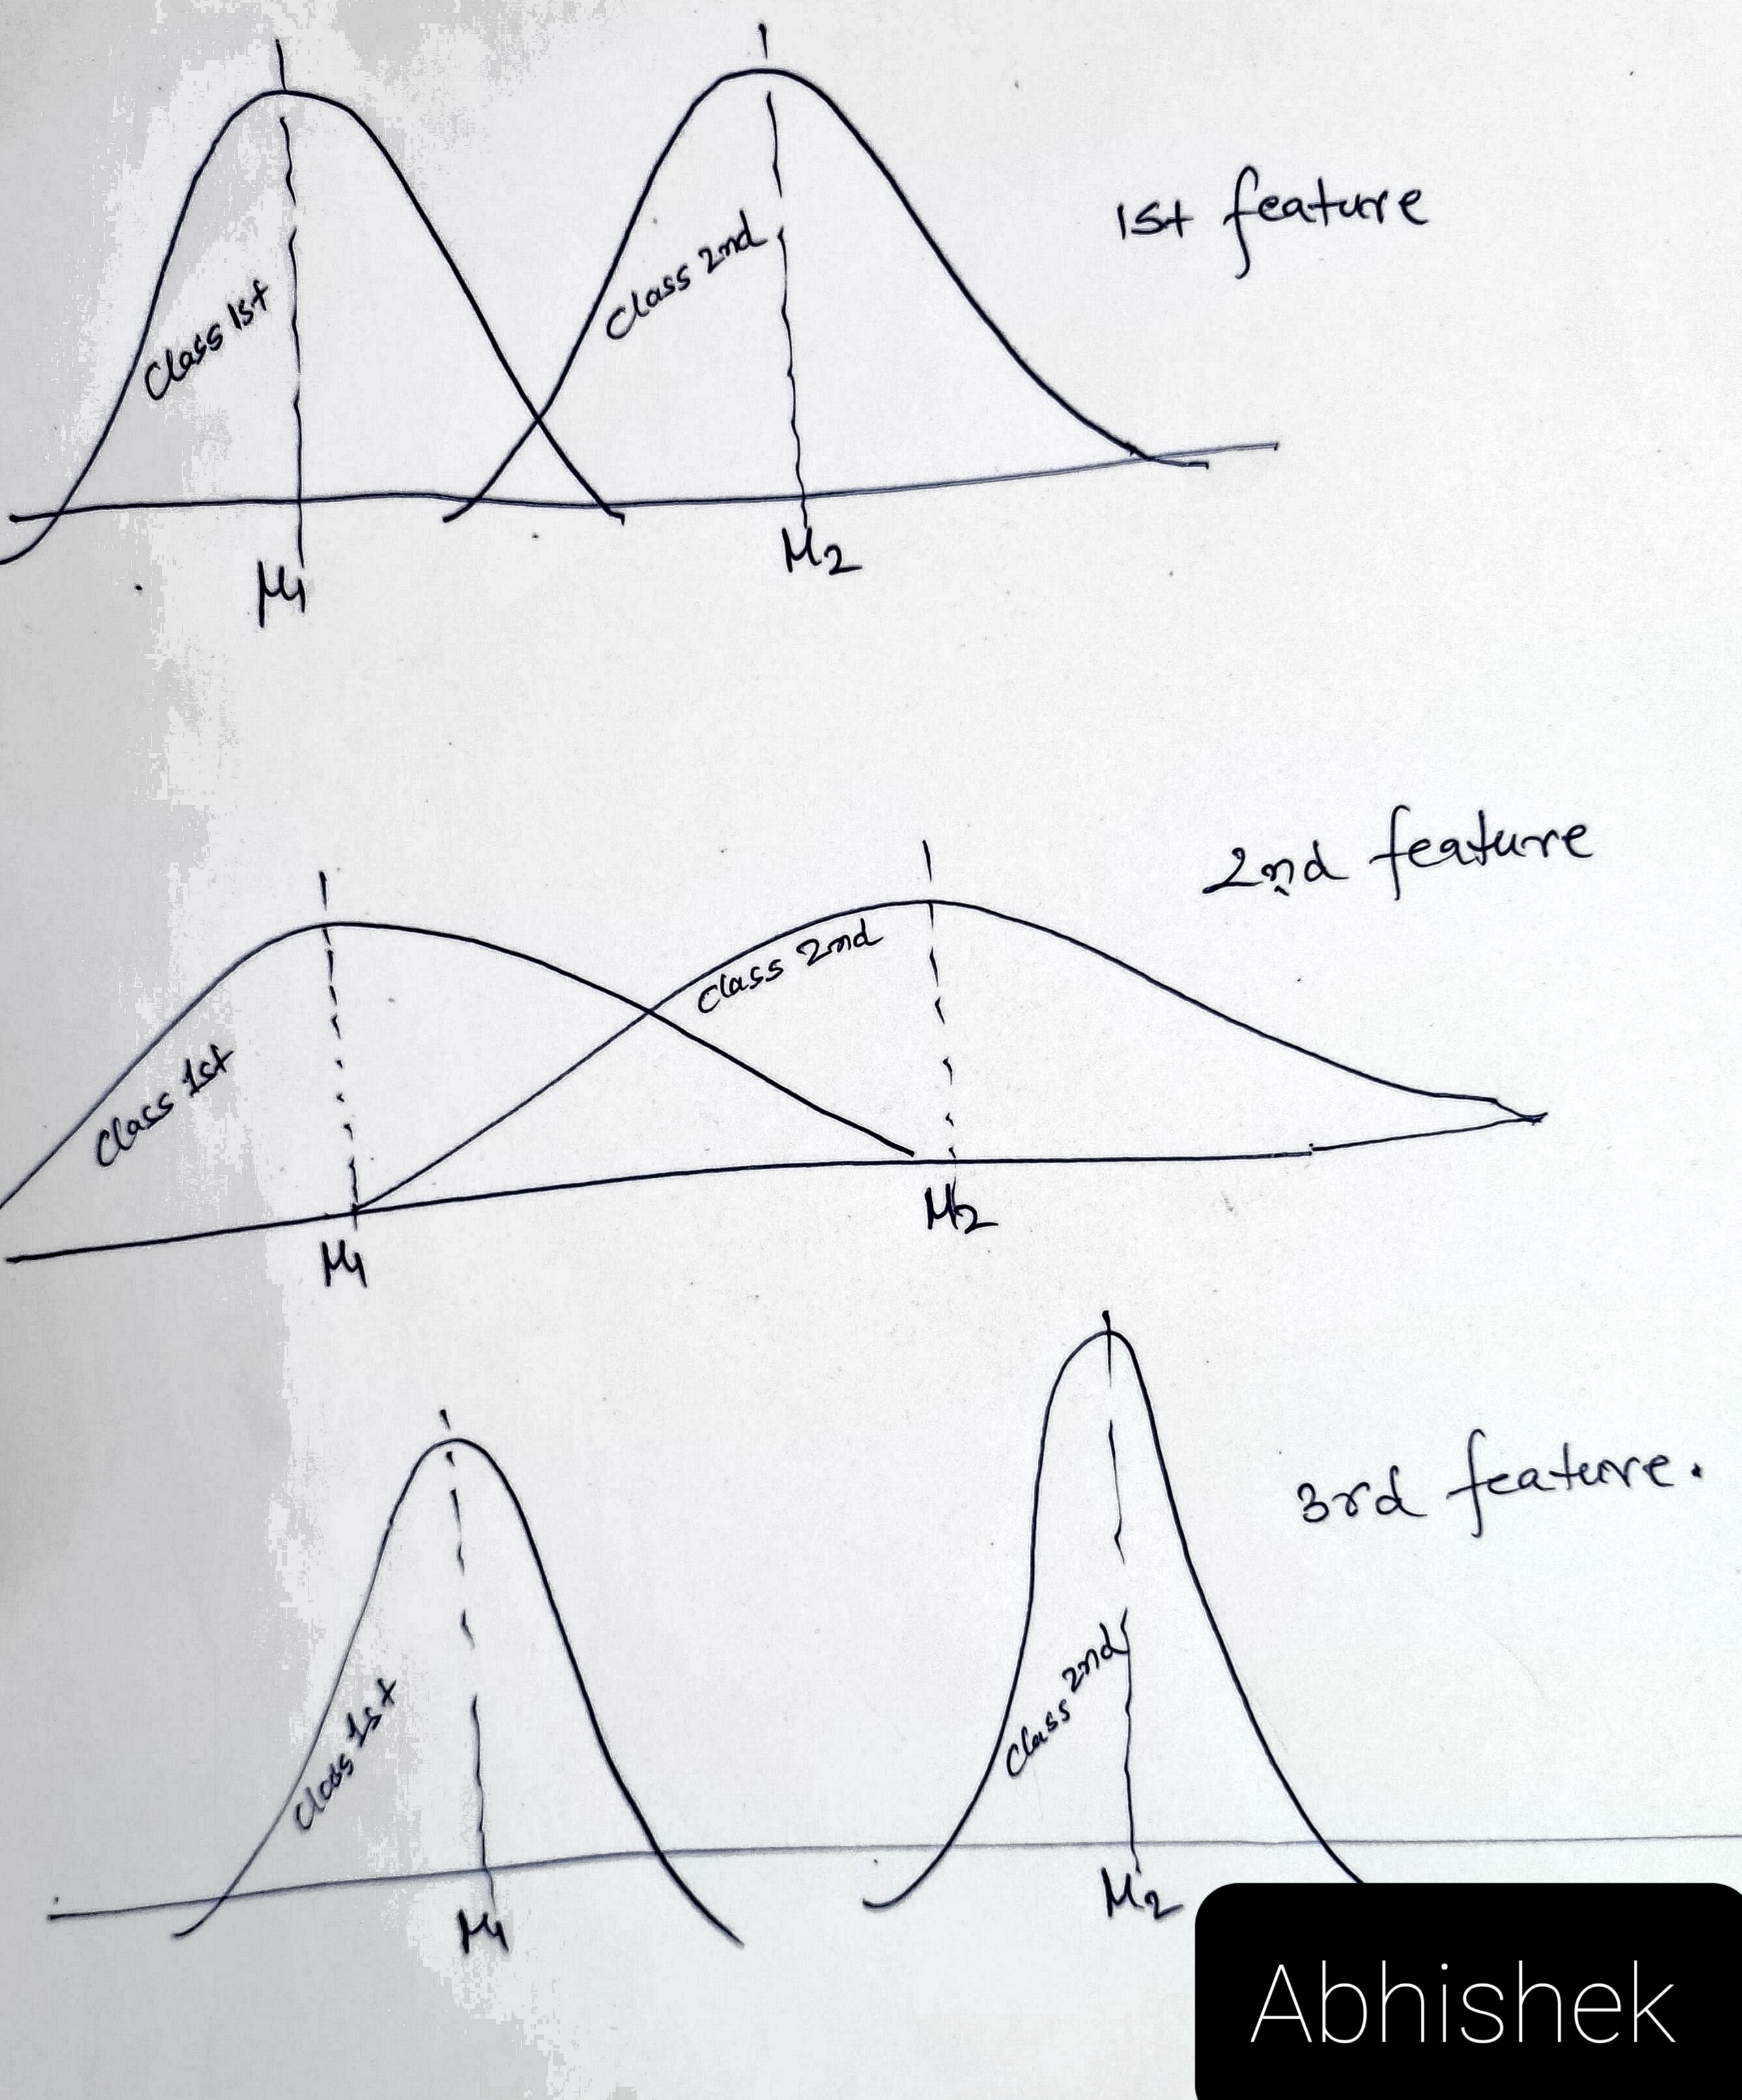

---


# Linear Discriminant Analysis -Learn Intuitively : Learning-1
#### Mathematical intuition behind LDA
We know PCA, an Unsupervised technique to reduce dimension but we need some another method which is supervised technique, which separate classes and preserve the separation of the classes and preserve variance of the data.


One such technique is **LDA - Linear Discriminant Analysis**, a **supervised technique**, which has the property to preserve class separation and variance in the data. LDA helps us to find the axes that maximizes the separation between classes and also minimizes the scatter(variance). 

And the goal of LDA is to project feature space(N-Dimensional) onto a smaller subspace k (k<=n-1) while maintaining the class discriminating information.

*So to say LDA uses the information from the features to create a new axis and projects the data on to the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.*

---

Let's understand the mathematical intuition behind the discriminating function and in the later series we will go deeper into understanding projection using LDA.

In [ ]:
# Loading data from csv file
import pandas as pd
data_path = '/gdrive/MyDrive/BLOGS/LDA/iris_data.csv'
df = pd.read_csv(data_path)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


We will understand LDA with the help of famous data set - iris data. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

We will consider only two classes setosa and virginica, for better understanding of maths behind LDA.

In [ ]:
df = df[df['variety']!='Versicolor']
df.shape
# 100 rows and 5 columns

(100, 5)

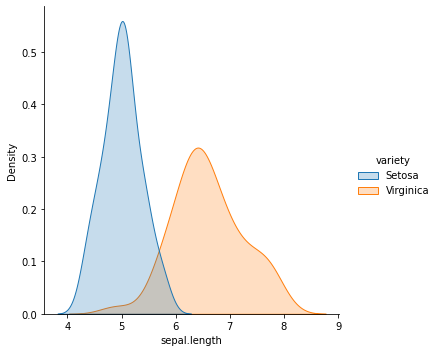

In [ ]:
import seaborn as sns
# distribution plot
sns.displot(df, x="sepal.length", hue="variety",kind="kde", fill=True)

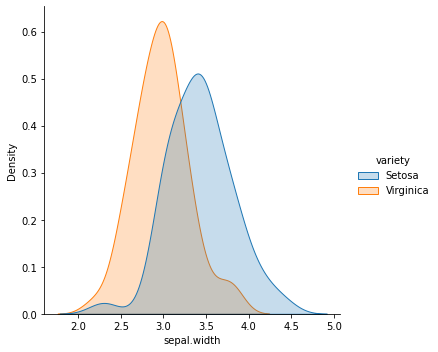

In [ ]:
sns.displot(df, x="sepal.width", hue="variety",kind="kde", fill=True)

Which feature is better feature to separate the classes with maximum separation?
1. **sepal.length ?**
  
    OR
2. **sepal.width ?**

Obviously the sepal.length is better visually but can we formulate this mathematically?
Yes, let say we come up with some function f(µ1,σ1,µ2,σ2) 


> **µ1 - mean of 1st class** 

> **σ1 - standard deviation of 1st class** 

> **µ2 - mean of 2nd class** 

> **σ2 - standard deviation of 2nd class**



Now we can say that separation between classes = 
            **square of distance between class means = (µ1-µ2)²**

we did square as it does not matter much, it just shows square of the distance between two classes as we don't want negative distance to cancel out positive distance.

we calculated mean and standard deviation of each class for both the features using python



Obviously the first feature which is sepal.length but why? - lets understand
let say we want some function f(µ1,σ1,µ2,σ2)
µ1 - mean of setosa class
σ1 - standard deviation of setosa class
µ2 - mean of Virginica class
σ2 - standard deviation of Virginica class

Now seperation between classes = (µ1-µ2)
we did square as it does not matter much, it just shows square of the distance between two classes.


In [ ]:
# Lets calculate mean and standard deviation of each class for sepal.length(sl)
µ1_sl = df[df['variety']=='Setosa']['sepal.length'].mean()
µ2_sl = df[df['variety']=='Virginica']['sepal.length'].mean()

σ1_sl = df[df['variety']=='Setosa']['sepal.length'].std()
σ2_sl = df[df['variety']=='Virginica']['sepal.length'].std()

# Lets calculate mean and standard deviation of each class for sepal.width(sw)
µ1_sw = df[df['variety']=='Setosa']['sepal.width'].mean()
µ2_sw = df[df['variety']=='Virginica']['sepal.width'].mean()

σ1_sw = df[df['variety']=='Setosa']['sepal.width'].std()
σ2_sw = df[df['variety']=='Virginica']['sepal.width'].std()

*Now calculate class separation between classes for each features which we call **Between Class Separation**.*

In [ ]:
print("Seperation between classes in case of sepal.length = ",round(((µ2_sl-µ1_sl)**2),2))

Seperation between classes in sepal.lemgth =  2.5


In [ ]:
print("Seperation between classes in case of sepal.width = ",round(((µ2_sw-µ1_sw)**2),2))

Seperation between classes in case of sepal.width =  0.21


*we select sepal.length as our feature which separates the classes with maximum separation as the between class separation is maximum for sepal.length.*

#### Now take 3rd feature as below:

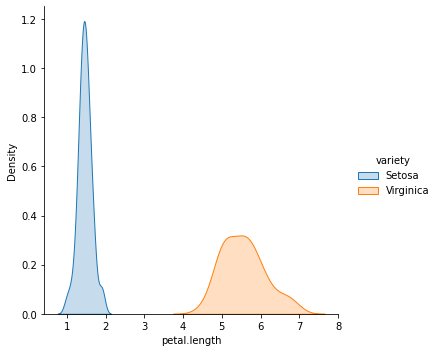

In [ ]:
sns.displot(df, x="petal.length", hue="variety",kind="kde", fill=True)

# petal.length is far better feature to separate the classes than sepal.length and sepal.width, visually we can say, why? 

let's do some more maths to understand this:

**So calculate between class separation for petal.length**


In [ ]:
# Lets calculate mean and standard deviation of each class for petal.length(pl) as well to compare with our previous results
µ1_pl = df[df['variety']=='Setosa']['petal.length'].mean()
µ2_pl = df[df['variety']=='Virginica']['petal.length'].mean()

σ1_pl = df[df['variety']=='Setosa']['petal.length'].std()
σ2_pl = df[df['variety']=='Virginica']['petal.length'].std()

In [ ]:
print("Seperation between classes in case of petal.length = ",round(((µ2_pl-µ1_pl)**2),2))

Seperation between classes in case of petal.length =  16.73


WoW, the class separation for **petal.length is 16.73** which is far more than the class separation in case of **sepal.length which was 2.5** , but what about variance? 


Do not forget,  Our second aim is to have minimum scatter (variance) also along with maximum between class separation which would separate class with maximum separation and preserve variation in the projected axes.


So let's find out within class variance for each feature:

In [ ]:
print("Within Class Variance in case of sepal.length = ",round((σ2_sl**2+σ1_sl**2),2))

Within Class Variance in case of sepal.length =  0.53


In [ ]:
print("Within Class Variance in case of sepal.width = ",round((σ2_sw**2+σ1_sw**2),2))

Within Class Variance in case of sepal.width =  0.25


In [ ]:
print("Within Class Variance in case of petal.length = ",round((σ2_pl**2+σ1_pl**2),2))

Within Class Variance in case of petal.length =  0.33


so the minimum within class variance is for sepal.width, but visually petal.length is better, what to do now?

It's time to formulize our optimization function, with the objective to maximize the value of the function, so let's define the function as:


> **f = (between class seperation)/(within class variance)
= ((µ1-µ2)²)/(σ1²+σ2²)**



### **So to maximize the value of the function we need to minimize variance and maximize separation.**

# ***This optimization function is our discriminating function.***
we will select the top features based on the top values computed using discriminating functions, lets calculate:

In [ ]:
print("function value for sepal.length = ",round((((µ2_sl-µ1_sl)**2)/((σ2_sl**2+σ1_sl**2))),2))

function value for sepal.length =  4.73


In [ ]:
print("function value for sepal.width = ",round((((µ2_sw-µ1_sw)**2)/((σ2_sw**2+σ1_sw**2))),2))

function value for sepal.width =  0.83


In [ ]:
print("function value for petal.length = ",round((((µ2_pl-µ1_pl)**2)/((σ2_pl**2+σ1_pl**2))),2))

function value for petal.length =  49.97


We can see that the discriminating value is maximum for petal.length, so this would be our 1st feature which would separate the class with maximum separation.

This is our **Linear Discriminant Function**, and it is a generalization of Fisher's linear discriminant, a method to find a linear combination of features that separates two or more classes. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

### Work for you, calculate the value of discriminant function for petal.width considering only for two classes.

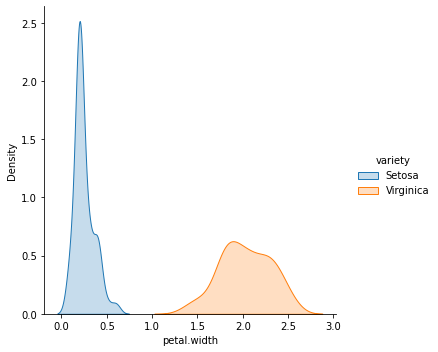

In [ ]:
sns.displot(df, x="petal.width", hue="variety",kind="kde", fill=True)

## ***Conclusion***

1. We formulated the optimization function of LDA and understood the maths behind the formulation. 
2. We still have to discuss applications of LDA and many more things in this series, so keep reading, keep learning.

## **Upcoming learnings:**
1. **Discriminant value in multiclass problem** 
2. **Fischer projection and comparison with scikit implementation & applications of LDA.**
3. **Hierarchical Fisher**

